In [1]:

from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt
from torch.utils.data.dataloader import DataLoader
import torch
import ssapp.Utils as Utils
torch.manual_seed(42)
import seaborn as sns


%matplotlib inline
%config InlineBackend.figure_formats = ['svg']
%load_ext autoreload
%autoreload 2

from ssapp.data.AntennaDatasetLoaders import PatchAntennaDataset
from ssapp.models.NeuralNetworkModels.Autoencoders import PatchAntenna1ConvAutoEncoder
from ssapp.models.HelperFunctions import loadModel

fig_save_dir = Path().cwd().parents[1] / 'reports' / 'figures'

BATCH_SIZE = 1
dataset = PatchAntennaDataset()
train_data, test_data = Utils.train_test_data_split(dataset, TRAIN_TEST_RATIO = 0.7)


train_loader = DataLoader(train_data,batch_size=BATCH_SIZE,shuffle=True)
test_loader = DataLoader(test_data,batch_size=BATCH_SIZE,shuffle=True)




DEFAULT_CONFIG = {
    "learning_rate": 4e-4,
    "epochs": 20000,
    "batch_size": 1,
    "latent_size": 2,
    "number_cuts" : 343,
    "random_seed" : 42,
    'coder_channel_1': 11,
    'coder_channel_2': 60,
    'cuts': 343}

model = loadModel(PatchAntenna1ConvAutoEncoder(config = DEFAULT_CONFIG),'treasured-haze-99') # Good 2-dimensional latent space

print(model)

print('3'+'3')

PatchAntenna1ConvAutoEncoder(
  (conv_encoder1): Conv2d(4, 11, kernel_size=(3, 3), stride=(2, 2), padding=(2, 2))
  (conv_encoder2): Conv2d(11, 60, kernel_size=(3, 3), stride=(2, 2))
  (linear_to_latent): Linear(in_features=5400, out_features=2, bias=True)
  (latent_to_linear): Linear(in_features=2, out_features=5400, bias=True)
  (conv_decoder1): ConvTranspose2d(60, 11, kernel_size=(3, 3), stride=(2, 2), output_padding=(0, 1))
  (conv_decoder2): ConvTranspose2d(11, 4, kernel_size=(3, 3), stride=(2, 2), padding=(2, 2))
  (activation): LeakyReLU(negative_slope=0.01)
)
33


tensor([[-1.3333,  9.0000,  3.1000]])


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


params [[-0.66666669  9.          2.9333334 ]
 [-2.          5.66666651  2.9666667 ]
 [ 0.66666669  5.          2.9000001 ]
 [ 0.          6.33333349  2.9000001 ]
 [-1.33333337  9.          3.0333333 ]
 [ 0.          7.          3.0333333 ]
 [-0.66666669  7.66666651  2.9333334 ]
 [-0.66666669  5.          2.9000001 ]
 [-1.33333337  8.33333302  2.9666667 ]
 [ 2.          7.          2.9666667 ]
 [ 1.33333337  8.33333302  2.9333334 ]
 [-0.66666669  5.66666651  3.0333333 ]
 [-0.66666669  8.33333302  3.0999999 ]
 [ 0.66666669  8.33333302  2.9333334 ]
 [-2.          7.66666651  2.9666667 ]
 [ 1.33333337  6.33333349  3.0666666 ]
 [ 0.          6.33333349  2.9666667 ]
 [-2.          5.66666651  3.0333333 ]
 [-0.66666669  6.33333349  3.        ]
 [ 2.          7.66666651  3.0333333 ]
 [ 1.33333337  6.33333349  2.9666667 ]
 [-2.          5.          3.0333333 ]
 [ 1.33333337  5.66666651  3.0333333 ]
 [ 0.          7.66666651  2.9000001 ]
 [ 0.          9.          3.0999999 ]
 [ 2.          9. 

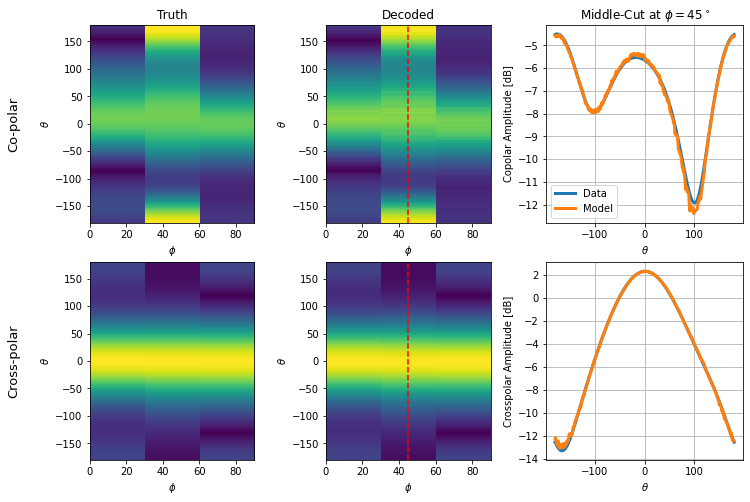

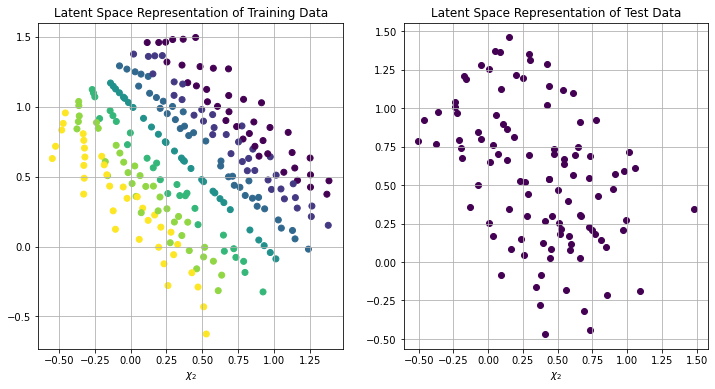

In [2]:
def plotEncodingVerificaiton(model, train_field):
    plt.figure(figsize = (15,10))
    plt.subplot(231)
    plt.imshow(torch.abs(train_field[0,:,:,1:2]),aspect = 1/100)
    plt.subplot(232)
    plt.imshow(torch.abs(model(train_field.float())[0,:,:,1:2]).detach(),aspect = 1/100) 
    plt.subplot(233)
    plt.plot(10*torch.log10(torch.abs(train_field[0,:,1,1:2])))
    plt.plot(10*torch.log10(torch.abs(model(train_field.float())[0,:,1,1:2])).detach()) 
    plt.subplot(234)
    plt.imshow(torch.abs(train_field[0,:,:,3:4]),aspect = 1/100)
    plt.subplot(235)
    plt.imshow(torch.abs(model(train_field.float())[0,:,:,3:4]).detach(),aspect = 1/100)
    plt.subplot(236)
    plt.plot(10*torch.log10(torch.abs(train_field[0,:,1,3:4])))
    plt.plot(10*torch.log10(torch.abs(model(train_field.float()))[0,:,1,3:4]).detach()) 
    
def plotEncodingVerificaiton2(model, train_field):

    EXTENT = [0,90,-180,180]
    ASPECT = 0.3
    LINEWIDTH = 3
    X_TEXT_DISPLACEMENT = -45
    thetas = np.linspace(-180,180,361)
    def setImgAxis(ax):
        ax.set_xlabel(r'$ \phi $')
        ax.set_ylabel(r'$ \theta $')
        ax.set_aspect(ASPECT) 

    fig,axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
    axs[0,0].imshow(torch.abs(train_field[0,:,:,1:2]),aspect = 1/100, interpolation = 'none',extent=EXTENT)
    axs[0,0].set_title('Truth')
    axs[0,0].text(X_TEXT_DISPLACEMENT,0,'Co-polar',rotation = 'vertical',fontsize = 13, va = 'center')
    setImgAxis(axs[0,0])

    axs[0,1].imshow(torch.abs(model(train_field.float())[0,:,:,1:2]).detach(), interpolation = 'none',extent=EXTENT)
    axs[0,1].set_title('Decoded')
    axs[0,1].axvline(x = 45, color = 'r', linestyle = '--')
    setImgAxis(axs[0,1])

    axs[0,2].plot(thetas,10*torch.log10(torch.abs(train_field[0,:,1,1:2])),label = 'Data',linewidth = LINEWIDTH)
    axs[0,2].plot(thetas,10*torch.log10(torch.abs(model(train_field.float())[0,:,1,1:2])).detach(),label = 'Model',linewidth = LINEWIDTH) 
    axs[0,2].grid()
    axs[0,2].set_title('Middle-Cut at $\phi = 45^\circ$')
    axs[0,2].set_xlabel(r'$\theta$')
    axs[0,2].legend()
    axs[0,2].set_ylabel('Copolar Amplitude [dB]')

    axs[1,0].imshow(torch.abs(train_field[0,:,:,3:4]),aspect = 1/100, interpolation = 'none',extent=EXTENT)
    axs[1,0].text(X_TEXT_DISPLACEMENT,0,'Cross-polar',rotation = 'vertical',fontsize = 13, va = 'center')
    setImgAxis(axs[1,0]) 
    

    axs[1,1].imshow(torch.abs(model(train_field.float())[0,:,:,3:4]).detach(),aspect = 1/100, interpolation = 'none',extent=EXTENT) 
    setImgAxis(axs[1,1])
    axs[1,1].axvline(x = 45, color = 'r', linestyle = '--')

    axs[1,2].plot(thetas,10*torch.log10(torch.abs(train_field[0,:,1,3:4])),linewidth = LINEWIDTH)
    axs[1,2].plot(thetas,10*torch.log10(torch.abs(model(train_field.float())[0,:,1,3:4])).detach(),linewidth = LINEWIDTH) 
    axs[1,2].set_xlabel(r'$\theta$')
    axs[1,2].grid()
    axs[1,2].set_ylabel('Crosspolar Amplitude [dB]')
    

def plotLatentSpace(model,train_loader,test_loader):
    # Model has to have a 2-dimensional latent space!
    plt.figure(figsize=(12,6))

    plt.subplot(121)
    plt.title('Latent Space Representation of Training Data')
    plt.xlabel("$\chi_1$")
    plt.xlabel("$\chi_2$")
    plt.grid()

    x,y = ([],[])
    plot_params = np.array([])
    for param,fields in train_loader:
        
        x_t,y_t = model.encode(fields.float()).detach().numpy()
        x.append(x_t)
        y.append(y_t)
        plot_params = np.append(plot_params,param.float().detach())

    print('params',plot_params.reshape(-1,3))
    plt.scatter(x,y,c=plot_params.reshape(-1,3)[:,0])



    plt.subplot(122)
    plt.title('Latent Space Representation of Test Data')
    plt.xlabel("$\chi_1$")
    plt.xlabel("$\chi_2$")
    plt.grid()
    for param,fields in test_loader:
        x,y = model.encode(fields.float()).detach().numpy()
        plt.scatter(x,y, c = param[0,1])
    



TRAIN_PARAMS,TRAIN_FIELDS = next(iter(train_loader))
TEST_PARAMS,TEST_FIELDS = next(iter(train_loader))

print(TEST_PARAMS)
plotEncodingVerificaiton2(model,train_field=TEST_FIELDS)
plt.savefig(fig_save_dir / 'Autoencoder_Example.eps', format='eps')
plotLatentSpace(model,train_loader=train_loader,test_loader=test_loader)


/zhome/5b/b/127277/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/zhome/5b/b/127277/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


[6.10244959e-01 3.46967224e-01 2.78481956e-02 1.46497892e-02
 2.71847412e-04 1.04798232e-05 5.19358623e-06 1.15855629e-06
 7.99178702e-07 1.73581899e-07]
0.999999819053018
torch.Size([240, 4332])
torch.Size([240, 3])


/tmp/ipykernel_193072/712798234.py:30: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar(im,ax=axs[i])
/tmp/ipykernel_193072/712798234.py:39: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar(im,ax=axs[i])
/tmp/ipykernel_193072/712798234.py:57: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar(im,ax=axs[i])


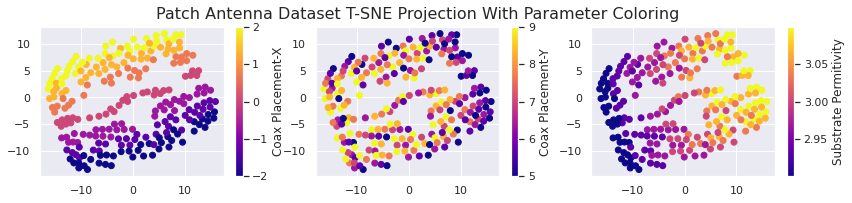

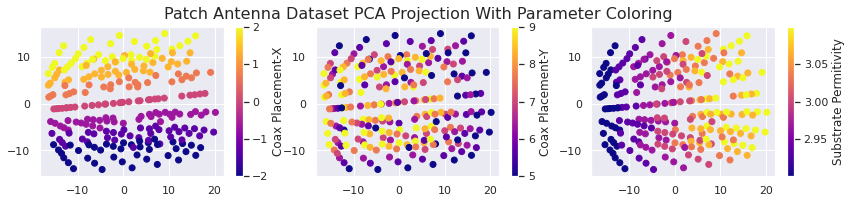

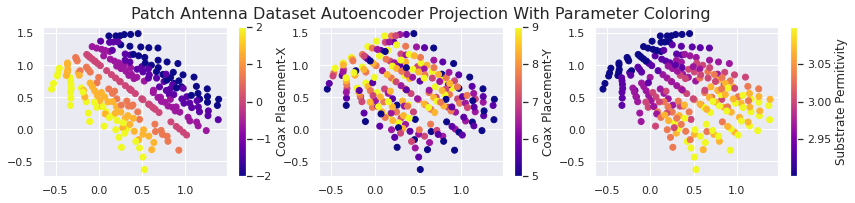

In [3]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
sns.set_theme()
bs = 240

train_loader_plt = DataLoader(train_data,batch_size=bs,shuffle=True)
test_loader_plt = DataLoader(test_data,batch_size=bs,shuffle=True)
TRAIN_PARAMS,TRAIN_FIELDS = next(iter(train_loader_plt))
TEST_PARAMS,TEST_FIELDS = next(iter(train_loader_plt))


tsne = TSNE(n_components=2, perplexity=30, n_iter=5000,init='pca')
pca = PCA(n_components=10)


tsne_results = tsne.fit_transform(TEST_FIELDS.reshape((bs,-1)))
pca_results = pca.fit_transform(TEST_FIELDS.reshape((bs,-1)))
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

print(TEST_FIELDS.reshape((len(TEST_FIELDS),-1)).shape)
print(TEST_PARAMS.reshape((len(TEST_FIELDS),-1)).shape)

param_names = ['Coax Placement-X','Coax Placement-Y','Substrate Permitivity']

fig, axs = plt.subplots(nrows = 1, ncols = 3,figsize = (14,2.75))
fig.suptitle('Patch Antenna Dataset T-SNE Projection With Parameter Coloring', fontsize = 16)
for i in range(0,3):
    im = axs[i].scatter(tsne_results[:,0],tsne_results[:,1],c = TEST_PARAMS[:,i],cmap = 'plasma')
    cbar = plt.colorbar(im,ax=axs[i])
    cbar.set_label(param_names[i])

plt.savefig(fig_save_dir / 'T_Sne.eps', format='eps')

fig, axs = plt.subplots(nrows = 1, ncols = 3,figsize = (14,2.75))
fig.suptitle('Patch Antenna Dataset PCA Projection With Parameter Coloring', fontsize = 16)
for i in range(0,3):
    im = axs[i].scatter(pca_results[:,0],pca_results[:,1],c = TEST_PARAMS[:,i],cmap = 'plasma')
    cbar = plt.colorbar(im,ax=axs[i])
    cbar.set_label(param_names[i])


plt.savefig(fig_save_dir / 'PCA.eps', format='eps')
fig, axs = plt.subplots(nrows = 1, ncols = 3,figsize = (14,2.75))
fig.suptitle('Patch Antenna Dataset Autoencoder Projection With Parameter Coloring', fontsize = 16)
for i in range(0,3):
    x,y = ([],[])
    plot_params = np.array([])
    for param,fields in train_loader:
        
        x_t,y_t = model.encode(fields.float()).detach().numpy()
        x.append(x_t)
        y.append(y_t)
        plot_params = np.append(plot_params,param.float().detach())

    im = axs[i].scatter(x,y,c=plot_params.reshape(-1,3)[:,i],cmap = 'plasma')
    cbar = plt.colorbar(im,ax=axs[i])
    cbar.set_label(param_names[i])

plt.savefig(fig_save_dir / 'Autoencoder_Latent_Space_Parameter_plots.eps', format='eps')

Text(0.5, 1.0, 'Patch Antenna Variance Explained by Prinicipal Components')

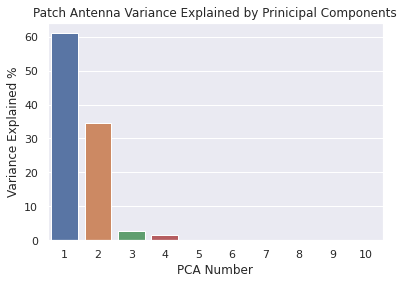

In [4]:

plt.figure()
sns.barplot(x = list(range(1,1+len(pca.explained_variance_ratio_))),y = pca.explained_variance_ratio_*100)
plt.xlabel('PCA Number')
plt.ylabel('Variance Explained %')
plt.title('Patch Antenna Variance Explained by Prinicipal Components')


In [5]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from ssapp.data.AntennaDatasetLoaders import ReflectorCutDataset

data = ReflectorCutDataset()

bs = len(data)

train_loader = DataLoader(data,batch_size=bs,shuffle=True)

TEST_PARAMS,TEST_FIELDS = next(iter(train_loader))


tsne = TSNE(n_components=2, perplexity=50, n_iter=300,init='pca')
pca = PCA(n_components=10)


tsne_results = tsne.fit_transform(TEST_FIELDS.reshape((bs,-1)))
pca_results = pca.fit_transform(TEST_FIELDS.reshape((bs,-1)))
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

print(TEST_PARAMS.reshape((len(TEST_FIELDS),-1)).shape)

param_names = ['Reflector Diameter','Focal Length','Offset']



/zhome/5b/b/127277/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/zhome/5b/b/127277/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


[0.45890987 0.44814514 0.03505349 0.03329597 0.00750699 0.00725501
 0.00240142 0.00231143 0.0009619  0.0009472 ]
0.9967884124878172
torch.Size([2499, 3])


/tmp/ipykernel_193072/3079191173.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar(im,ax=axs[i])
/tmp/ipykernel_193072/3079191173.py:13: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar(im,ax=axs[i])
/tmp/ipykernel_193072/3079191173.py:22: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar(im,ax=axs[i])


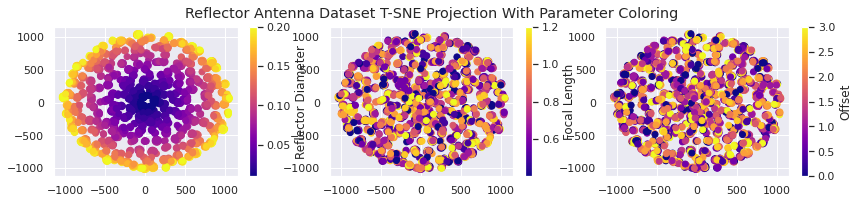

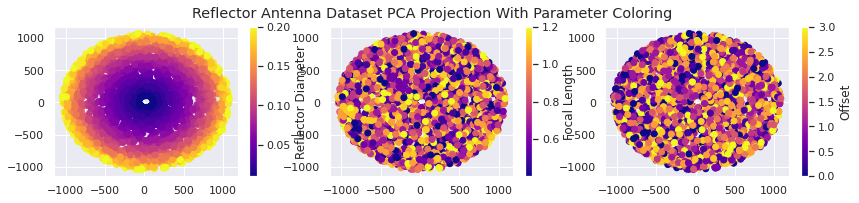

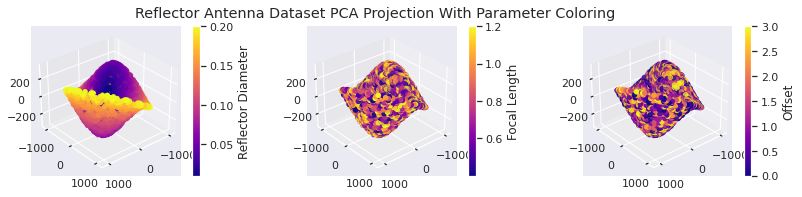

In [6]:

fig, axs = plt.subplots(nrows = 1, ncols = 3,figsize = (14,2.75))
fig.suptitle('Reflector Antenna Dataset T-SNE Projection With Parameter Coloring')
for i in range(0,3):
    im = axs[i].scatter(tsne_results[:,0],tsne_results[:,1],c = TEST_PARAMS[:,i],cmap = 'plasma')
    cbar = plt.colorbar(im,ax=axs[i])
    cbar.set_label(param_names[i])


fig, axs = plt.subplots(nrows = 1, ncols = 3,figsize = (14,2.75))
fig.suptitle('Reflector Antenna Dataset PCA Projection With Parameter Coloring')
for i in range(0,3):
    im = axs[i].scatter(pca_results[:,0],pca_results[:,1],c = TEST_PARAMS[:,i],cmap = 'plasma')
    cbar = plt.colorbar(im,ax=axs[i])
    cbar.set_label(param_names[i])


fig, axs = plt.subplots(nrows = 1, ncols = 3,figsize = (14,2.75),subplot_kw=dict(projection='3d'))
fig.suptitle('Reflector Antenna Dataset PCA Projection With Parameter Coloring')
for i in range(0,3):
    axs[i].view_init(30, 50)
    im = axs[i].scatter(pca_results[:,0],pca_results[:,1],pca_results[:,2],c = TEST_PARAMS[:,i],cmap = 'plasma')
    cbar = plt.colorbar(im,ax=axs[i])
    cbar.set_label(param_names[i])

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(projection='3d')
ax.view_init(30, 90)
ax.scatter(pca_results[:,0],pca_results[:,1],pca_results[:,2],c = TEST_PARAMS[:,0],cmap = 'plasma',)


Text(0.5, 1.0, 'Simple Reflector Variance Explained by Prinicipal Components')

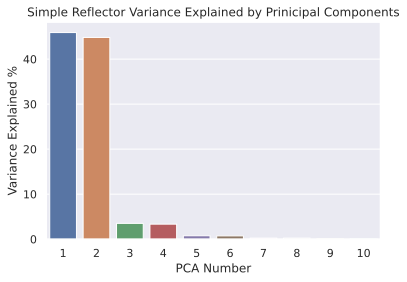

In [ ]:
plt.figure()
sns.barplot(x = list(range(1,1+len(pca.explained_variance_ratio_))),y = pca.explained_variance_ratio_*100)
plt.xlabel('PCA Number')
plt.ylabel('Variance Explained %')
plt.title('Simple Reflector Variance Explained by Prinicipal Components')

[5.75211114e-01 4.21824710e-01 1.50156511e-03 1.02240212e-03
 1.81585463e-04 1.16192333e-04 1.77206918e-05 1.07597155e-05
 7.70110294e-06 5.74049419e-06]
0.9998994912767614
torch.Size([360, 3])


/tmp/ipykernel_191213/2768899169.py:28: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar(im,ax=axs[i])


Text(0.5, 1.0, 'Simple Reflector Variance Explained by Prinicipal Components')

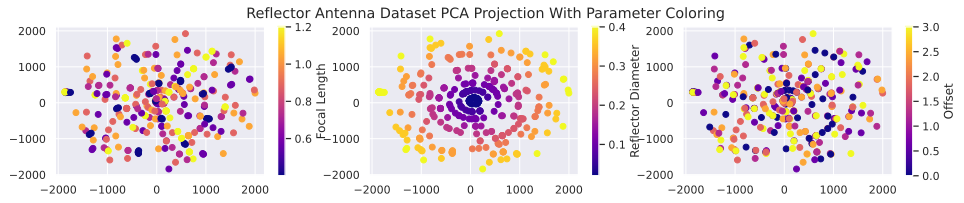

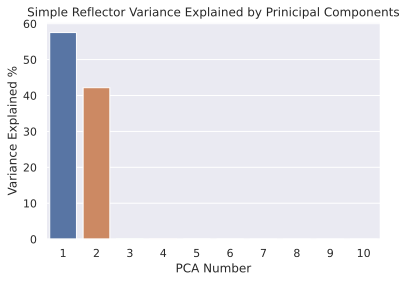

In [ ]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from ssapp.data.AntennaDatasetLoaders import ReflectorCutDataset2

data = ReflectorCutDataset2()

train_loader = DataLoader(data,batch_size=len(data),shuffle=True)

TEST_PARAMS,TEST_FIELDS = next(iter(train_loader))

#tsne = TSNE(n_components=2, perplexity=50, n_iter=300,init='pca')
pca = PCA(n_components=10)


pca_results = pca.fit_transform(TEST_FIELDS.reshape((len(data),-1)))
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

print(TEST_PARAMS.reshape((len(TEST_FIELDS),-1)).shape)

param_names = ['Focal Length','Reflector Diameter','Offset']


fig, axs = plt.subplots(nrows = 1, ncols = 3,figsize = (16,2.75))
fig.suptitle('Reflector Antenna Dataset PCA Projection With Parameter Coloring')
for i in range(0,3):
    im = axs[i].scatter(pca_results[:,0],pca_results[:,1],c = TEST_PARAMS[:,i],cmap = 'plasma')
    cbar = plt.colorbar(im,ax=axs[i])
    cbar.set_label(param_names[i])


plt.figure()
sns.barplot(x = list(range(1,1+len(pca.explained_variance_ratio_))),y = pca.explained_variance_ratio_*100)
plt.xlabel('PCA Number')
plt.ylabel('Variance Explained %')
plt.title('Simple Reflector Variance Explained by Prinicipal Components')

In [ ]:

data_reflector = ReflectorCutDataset2()
data_patch = PatchAntennaDataset()

REFLECTOR_FIELDS torch.Size([360, 361, 3, 4])
PATCH_FIELDS torch.Size([343, 361, 3, 4])
REFLECTOR_FIELDS torch.Size([360, 4332])
PATCH_FIELDS torch.Size([343, 4332])
(703, 4332)


/zhome/5b/b/127277/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/zhome/5b/b/127277/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


[5.75134421e-01 4.21342268e-01 1.50463851e-03 1.02543296e-03
 4.50585473e-04 1.80297908e-04 1.16007610e-04 6.75509380e-05
 3.40854314e-05 1.76644357e-05]
0.9998729516287729


/tmp/ipykernel_191213/2786008568.py:35: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar(im,ax=axs[i])
/tmp/ipykernel_191213/2786008568.py:43: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar(im,ax=axs[i])


Text(0.5, 1.0, 'Simple Reflector Variance Explained by Prinicipal Components')

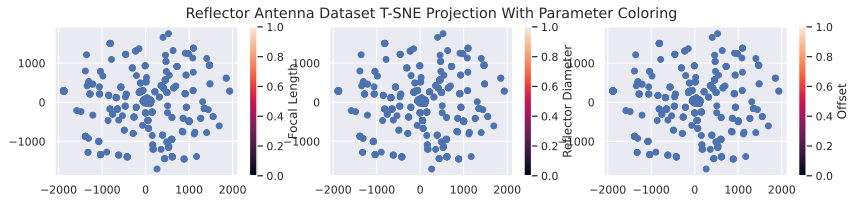

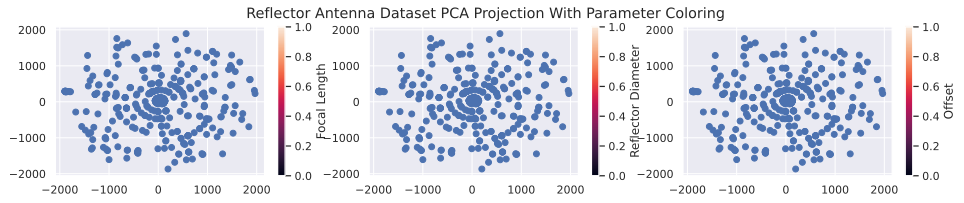

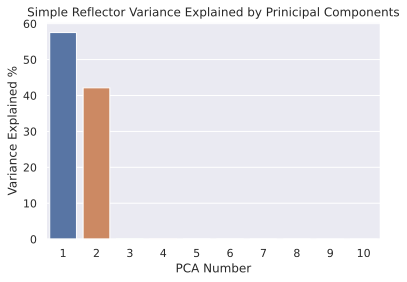

In [ ]:



dataloader_reflector = DataLoader(data_reflector,batch_size=len(data_reflector),shuffle=True)


dataloader_patch = DataLoader(data_patch,batch_size=len(data_patch),shuffle=True)
TEST_PARAMS,REFLECTOR_FIELDS = next(iter(dataloader_reflector))
TEST_PARAMS,PATCH_FIELDS = next(iter(dataloader_patch))
print('REFLECTOR_FIELDS',REFLECTOR_FIELDS.shape)
print('PATCH_FIELDS',PATCH_FIELDS.shape)

#tsne = TSNE(n_components=2, perplexity=50, n_iter=300,init='pca')

REFLECTOR_FIELDS = REFLECTOR_FIELDS.reshape(len(data_reflector),-1)
PATCH_FIELDS = PATCH_FIELDS.reshape(len(data_patch),-1)
print('REFLECTOR_FIELDS',REFLECTOR_FIELDS.shape)
print('PATCH_FIELDS',PATCH_FIELDS.shape)
ALL_DATA = np.append(REFLECTOR_FIELDS,PATCH_FIELDS,axis=0)
print(ALL_DATA.shape)

tsne = TSNE(n_components=2, perplexity=50, n_iter=300,init='pca')
pca = PCA(n_components=10)

pca_results = pca.fit_transform(ALL_DATA)
tsne_results = tsne.fit_transform(ALL_DATA)
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))


param_names = ['Focal Length','Reflector Diameter','Offset']


fig, axs = plt.subplots(nrows = 1, ncols = 3,figsize = (14,2.75))
fig.suptitle('Reflector Antenna Dataset T-SNE Projection With Parameter Coloring')
for i in range(0,3):
    im = axs[i].scatter(tsne_results[:,0],tsne_results[:,1])
    cbar = plt.colorbar(im,ax=axs[i])
    cbar.set_label(param_names[i])


fig, axs = plt.subplots(nrows = 1, ncols = 3,figsize = (16,2.75))
fig.suptitle('Reflector Antenna Dataset PCA Projection With Parameter Coloring')
for i in range(0,3):
    im = axs[i].scatter(pca_results[:,0],pca_results[:,1])
    cbar = plt.colorbar(im,ax=axs[i])
    cbar.set_label(param_names[i])


plt.figure()
sns.barplot(x = list(range(1,1+len(pca.explained_variance_ratio_))),y = pca.explained_variance_ratio_*100)
plt.xlabel('PCA Number')
plt.ylabel('Variance Explained %')
plt.title('Simple Reflector Variance Explained by Prinicipal Components')